<a href="https://colab.research.google.com/github/rola1174/Elevvo_Tasks/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
# Install kaggle
!pip install kaggle

# Upload kaggle.json manually
from google.colab import files
files.upload()

# Move kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

# Unzip
!unzip customer-segmentation-tutorial-in-python.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 5.84MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [3]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Show first rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Dataset information
df.info()

# Statistical summary
df.describe()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


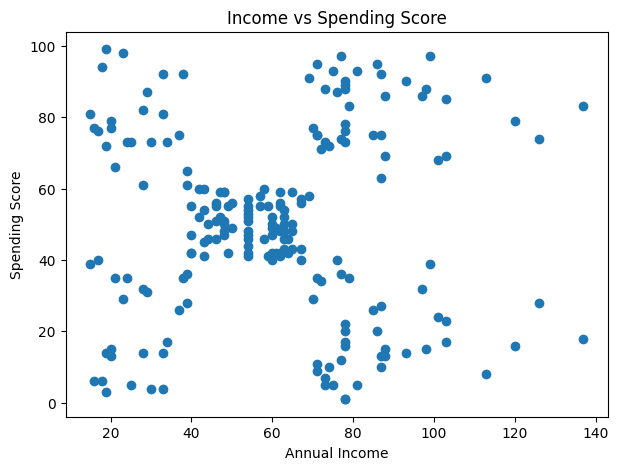

In [5]:
# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(7,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Score")
plt.show()

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

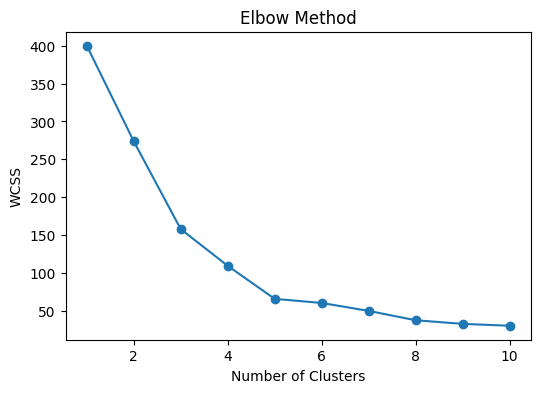

In [8]:
wcss = []

# Test different cluster numbers
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster column to dataset
df['Cluster'] = clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


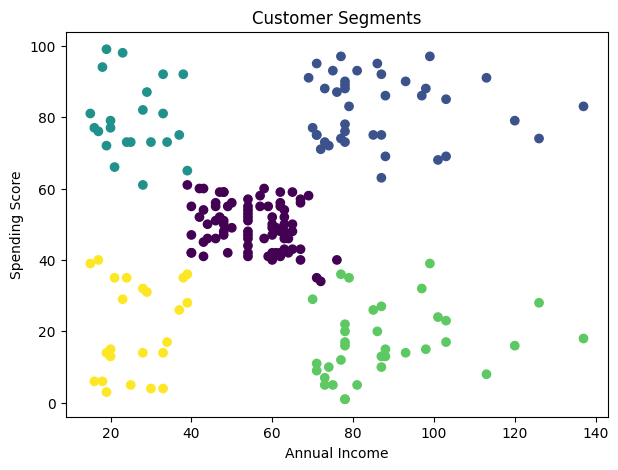

In [10]:
plt.figure(figsize=(7,5))

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'])

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()

In [11]:
# Average values per cluster
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


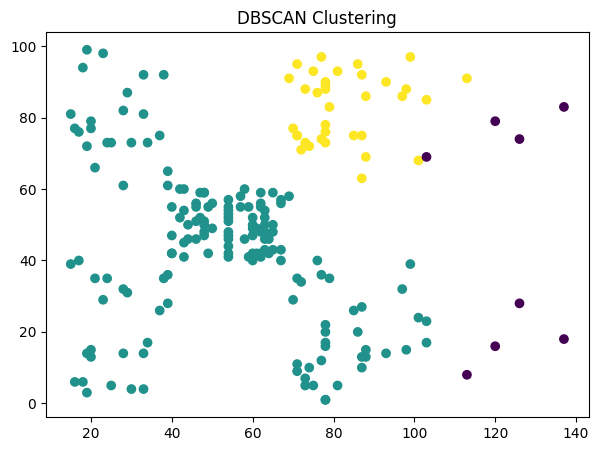

In [12]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = db_clusters

plt.figure(figsize=(7,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['DBSCAN_Cluster'])
plt.title("DBSCAN Clustering")
plt.show()

In [13]:
%%writefile README.md
# Customer Segmentation using Clustering

## Project Overview
This project performs **Customer Segmentation** using unsupervised machine learning techniques.
Customers are grouped into different segments based on their **Annual Income** and **Spending Score** to help businesses understand customer behavior.

---

## Dataset
Dataset used: **Mall Customers Dataset (Kaggle)**
It contains the following features:

- CustomerID – Unique customer identifier
- Gender – Customer gender
- Age – Customer age
- Annual Income (k$) – Annual income of customer
- Spending Score (1–100) – Score assigned based on customer behavior and spending nature

---

## Objectives
- Perform **data exploration and visualization**
- Apply **feature scaling**
- Determine optimal number of clusters using the **Elbow Method**
- Apply **K-Means clustering**
- Visualize customer segments using **2D plots**
- Compare clustering with **DBSCAN** (Bonus)
- Analyze **average spending per cluster**

---

## Tools & Libraries
- Python
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn

---

## Methodology
1. Load and explore the dataset
2. Select relevant features (Income and Spending Score)
3. Standardize features using StandardScaler
4. Determine optimal clusters using the Elbow Method
5. Apply K-Means clustering
6. Visualize clusters
7. Evaluate cluster averages
8. Apply DBSCAN clustering (bonus)

---

## Results
The clustering model successfully segmented customers into groups representing different spending behaviors such as:
- High income – high spending
- High income – low spending
- Low income – high spending
- Average income – average spending

These segments can help businesses create targeted marketing strategies.

---

## Conclusion
Customer segmentation using clustering provides valuable insights into customer behavior without labeled data.
K-Means clustering effectively identified meaningful customer groups, and DBSCAN provided an alternative clustering approach for comparison.


Writing README.md
